In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [3]:
weather_df= pd.read_csv("../data/weather_data.csv")

In [4]:
weather_df

,date,maxtempC,mintempC,avgtempC,sunHour,humidity,pressure
0,2018-01-01,8,6,7,5.0,69,999
1,2018-01-02,12,4,8,2.0,81,1005
2,2018-01-03,12,7,9,8.0,60,996
3,2018-01-04,12,7,8,1.0,78,995
4,2018-01-05,9,4,7,8.0,73,995
...,...,...,...,...,...,...,...
2186,2023-12-27,12,7,10,1.0,83,1008
2187,2023-12-28,11,9,11,1.0,72,1006
2188,2023-12-29,10,6,9,7.0,73,1007
2189,2023-12-30,11,6,9,1.0,80,1005


In [5]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.set_index('date', inplace=True)

In [6]:
weather_df['avgtempC'] = weather_df['avgtempC'].astype(int)
weather_df['maxtempC'] = weather_df['maxtempC'].astype(int)
weather_df['mintempC'] = weather_df['mintempC'].astype(int)
weather_df['humidity'] = weather_df['humidity'].astype(int)
weather_df['pressure'] = weather_df['pressure'].astype(int)

In [7]:
temp_df = weather_df['avgtempC']

In [16]:
train_df = temp_df['2018':'2022'].resample('M').mean()
test_df = temp_df['2023':'2024'].resample('M').mean()

In [19]:
model = pm.auto_arima(train_df, seasonal=True, m=12)

In [21]:
model.fit(train_df)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

In [22]:
forecast = model.predict(n_periods=len(test_df))

In [10]:
forecast = pd.DataFrame(forecast,index = test_df.index,columns=['Prediction'])

In [23]:
forecast

2023-01-31     4.018545
2023-02-28     6.526286
2023-03-31     8.239412
2023-04-30     8.550236
2023-05-31    12.071899
2023-06-30    17.002471
2023-07-31    18.895639
2023-08-31    18.360001
2023-09-30    16.380599
2023-10-31    13.383942
2023-11-30     9.232579
2023-12-31     6.727783
Freq: M, dtype: float64

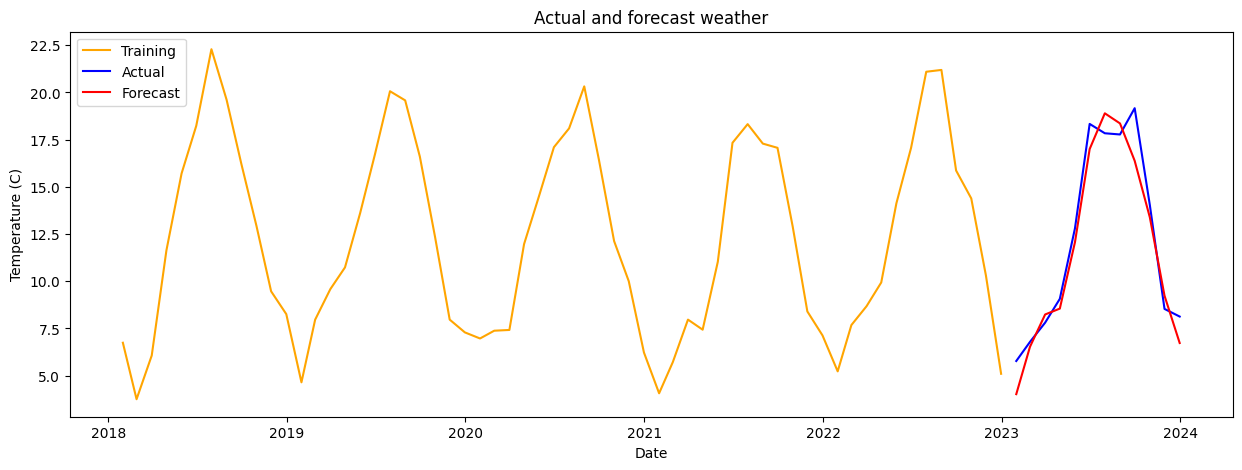

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize=(15,5))
plt.plot(train_df, label='Training',color='orange')
plt.plot(test_df, label='Actual', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Actual and forecast weather')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper left', fontsize=10)
plt.show()
plt.savefig('../figures/actualvsforecast.png', dpi=300)

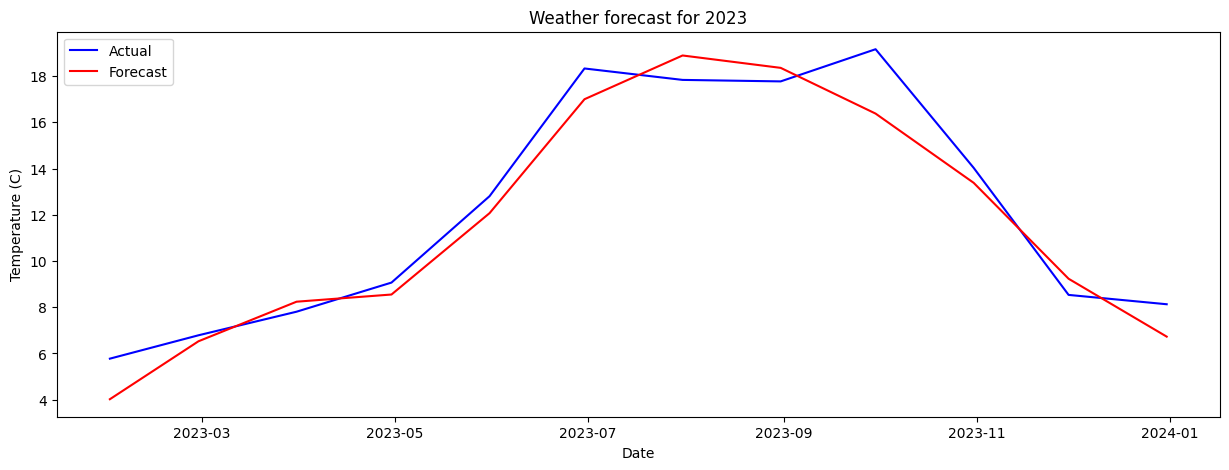

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(15,5))
plt.plot(test_df, label='Actual',color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Weather forecast for 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend(loc='upper left', fontsize=10)
plt.show()
plt.savefig('../figures/forecast2023.png', dpi=300)

In [28]:
error = mean_squared_error(test_df, forecast)
print('Test Mean Squared Error: ',error)

Test Mean Squared Error:  1.5008102002582422


In [29]:
# Obliczanie RMSE
rmse = np.sqrt(mean_squared_error(test_df, forecast))
print(f'RMSE: {rmse}')

RMSE: 1.2250755896099808
